<a href="https://colab.research.google.com/github/robingenz/htwg-machine-learning-exercises/blob/main/exercises/01_Explorative_Analyse_und_PCA/01-explorative-analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression on Fish Data

## Setup

### Einbinden von Paketen

In [184]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import math
%matplotlib inline

np.__version__, pd.__version__, sklearn.__version__

('1.23.4', '1.5.0', '1.1.3')

In [185]:
%load_ext version_information
%version_information

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.10.8 64bit [GCC 10.2.1 20210110]
IPython 8.6.0
OS Linux 5.10.104 linuxkit aarch64 with glibc2.31
Sun Nov 13 09:02:48 2022 UTC

### Einlesen der Daten

In [186]:
# The Fish Data Set
# See example 2 from https://stats.idre.ucla.edu/r/dae/zip/ 
#"nofish","livebait","camper","persons","child","xb","zg","count"
import os
from urllib.request import urlretrieve
if not os.path.isfile('fishing.npz'):
    print("Downloading")
    urlretrieve('http://www-home.htwg-konstanz.de/~oduerr/data/fishing.npz', filename = 'data/fishing.npz')
data = np.load('data/fishing.npz')
dateDownloaded = !date #Calling Linux
dateDownloaded

Downloading


['Sun Nov 13 09:02:48 UTC 2022']

In [187]:
# Training Set X
xTrainingDataFrame = pd.DataFrame(data['Xt'], columns=["Livebait", "Camper", "Person", "Child"])
xTrainingDataFrame.insert(0, 'Intercept', np.ones(200))
xTrainingDataFrame.describe()

,Intercept,Livebait,Camper,Person,Child
count,200.0,200.000000,200.000000,200.000000,200.000000
mean,1.0,0.855000,0.600000,2.540000,0.705000
std,0.0,0.352984,0.491127,1.133501,0.889907
min,1.0,0.000000,0.000000,1.000000,0.000000
25%,1.0,1.000000,0.000000,2.000000,0.000000
50%,1.0,1.000000,1.000000,3.000000,0.000000
75%,1.0,1.000000,1.000000,4.000000,1.000000
max,1.0,1.000000,1.000000,4.000000,3.000000


In [188]:
# Test Set X
xTestDataFrame = pd.DataFrame(data['Xte'], columns=["Livebait", "Camper", "Person", "Child"])
xTestDataFrame.insert(0, 'Intercept', np.ones(50))
xTestDataFrame.describe()

,Intercept,Livebait,Camper,Person,Child
count,50.0,50.000000,50.000000,50.000000,50.000000
mean,1.0,0.900000,0.540000,2.480000,0.600000
std,0.0,0.303046,0.503457,1.034901,0.670059
min,1.0,0.000000,0.000000,1.000000,0.000000
25%,1.0,1.000000,0.000000,2.000000,0.000000
50%,1.0,1.000000,1.000000,2.000000,0.500000
75%,1.0,1.000000,1.000000,3.000000,1.000000
max,1.0,1.000000,1.000000,4.000000,2.000000


In [189]:
# Training Set Y
yTrainingDataFrame = pd.DataFrame(data['yt'], columns=["Count"])
yTrainingDataFrame.describe()

,Count
count,200.000000
mean,3.355000
std,11.984872
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,149.000000


In [190]:
# Test Set Y
yTestDataFrame = pd.DataFrame(data['yte'], columns=["Count"])
yTestDataFrame.describe()

,Count
count,50.000000
mean,3.060000
std,10.222843
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,65.000000


## Aufgaben

### Aufgabe a)

In [191]:
# See: https://github.com/ioskn/mldl_htwg/blob/master/linear_methods/LinearRegression.ipynb
X = xTrainingDataFrame.to_numpy()
y = yTrainingDataFrame.to_numpy()
XTX = np.matmul(X.T,X)
XTXI = np.linalg.inv(XTX)
XTXIXT = np.matmul(XTXI, X.T)
w = np.matmul(XTXIXT,y)
w

array([[-8.49222821],
       [ 2.4822138 ],
       [ 2.95430727],
       [ 4.64953914],
       [-5.47160051]])

In [207]:
diffObservedYAndPredictedYTraining = np.matmul(X,w).flatten() - y.flatten()
mse_training = np.mean(np.square(diffObservedYAndPredictedYTraining))
mse_training

73.75591483452077

### Aufgabe b)

In [208]:
# See: https://github.com/ioskn/mldl_htwg/blob/master/linear_methods/LinearRegression.ipynb
from sklearn.linear_model import LinearRegression
model_skl = LinearRegression(fit_intercept=False) #We have an extended X
model_skl.fit(X,y)
model_skl.coef_

array([[-13.7236033 ,   6.80694922,   2.68477058,   5.55087405,
         -7.59765794]])

### Aufgabe c)

Bestimmen des **Root Mean Square Errors (RMSE)** für das Testset:

In [209]:
X = xTestDataFrame.to_numpy()
y = yTestDataFrame.to_numpy()
diffObservedYAndPredictedYTest = np.matmul(X,w).flatten() - y.flatten()
mse_test = np.mean(np.square(diffObservedYAndPredictedYTest))
rmse_test = np.sqrt(mse_test)
rmse_test

8.588126386734231

Bestimmen der **durchschnittlichen negativen Log-Likelihood (NLL)** für das Testset:

In [210]:
from scipy.stats import norm
sigma2 = mse_test

gaussian = norm.pdf(diffObservedYAndPredictedYTest, loc=(diffObservedYAndPredictedYTest).mean(), scale=np.sqrt(sigma2))
nll = -np.log(gaussian).mean()
print('NLL', nll)

NLL 3.5674507288796327


### Aufgabe d)

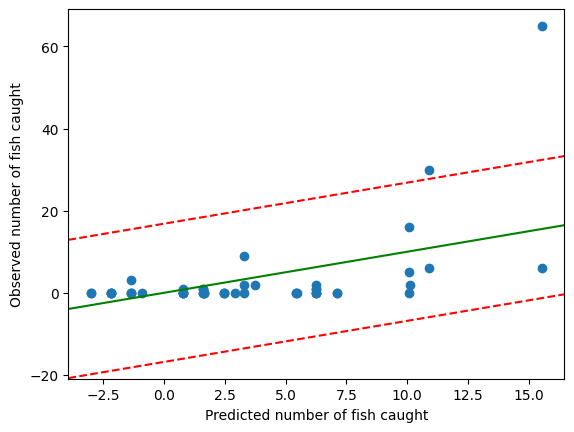

In [214]:
from scipy.stats import linregress

yPred = np.matmul(X,w).flatten()
plt.scatter(yPred, y.flatten())

reg = linregress(yPred, yPred)
plt.axline(xy1=(0, reg.intercept), slope=reg.slope, color="green")

reg = linregress(yPred, yPred+1.96*np.sqrt(sigma2))
plt.axline(xy1=(0, reg.intercept), slope=reg.slope, linestyle="--", color="red")

reg = linregress(yPred, yPred-1.96*np.sqrt(sigma2))
plt.axline(xy1=(0, reg.intercept), slope=reg.slope, linestyle="--", color="red")

plt.xlabel('Predicted number of fish caught')
plt.ylabel('Observed number of fish caught')
plt.show()

### Aufgabe e)